In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [22]:
df = pd.read_csv('_data\dataset_2021-5-26-10-14.csv', sep = '\t', encoding = 'utf-8')
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


Tratamento dos valores numéricos

In [23]:
df.isna().sum() # verificação de missing values (não há)
df.describe()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
count,117273.000000,117273.000000,117273.000000,1.172730e+05,1.172730e+05,1.172730e+05,117273.000000,1.172730e+05,117273.000000,1.172730e+05,117273.0,1.172730e+05,117273.000000,117273.000000,1.172730e+05,117273.000000,117273.000000,117273.000000
mean,0.148721,55.582906,17.106291,6.421384e+04,2.454043e+03,1.085557e+06,0.240456,2.051017e+03,0.018922,9.218511e+02,0.0,5.603808e+02,0.014974,0.000622,2.406180e+04,6.279169,2017.976798,0.166662
std,0.853794,60.989240,10.993605,5.252546e+05,8.093313e+04,7.444825e+06,10.707825,8.831758e+04,0.534034,4.861025e+04,0.0,8.459291e+04,0.397264,0.030759,4.906680e+05,3.194997,0.742185,0.372676
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,-7.446899e+02,1.000000,2017.000000,0.000000
25%,0.000000,20.166667,11.121543,5.657400e+02,0.000000e+00,1.944250e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,2.140419e+03,3.000000,2017.000000,0.000000
50%,0.000000,38.000000,16.000000,4.451740e+03,0.000000e+00,8.134878e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,4.012731e+03,7.000000,2018.000000,0.000000
75%,0.000000,69.750000,18.248850,2.006296e+04,0.000000e+00,3.322643e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,9.645923e+03,9.000000,2019.000000,0.000000
max,26.000000,951.000000,90.000000,7.219759e+07,1.315050e+07,4.603203e+08,2324.000000,1.630546e+07,80.000000,8.390986e+06,0.0,1.972251e+07,40.000000,2.000000,1.503340e+08,12.000000,2019.000000,1.000000


array([[<AxesSubplot: title={'center': 'default_3months'}>,
        <AxesSubplot: title={'center': 'ioi_36months'}>,
        <AxesSubplot: title={'center': 'ioi_3months'}>,
        <AxesSubplot: title={'center': 'valor_por_vencer'}>],
       [<AxesSubplot: title={'center': 'valor_vencido'}>,
        <AxesSubplot: title={'center': 'valor_quitado'}>,
        <AxesSubplot: title={'center': 'quant_protestos'}>,
        <AxesSubplot: title={'center': 'valor_protestos'}>],
       [<AxesSubplot: title={'center': 'quant_acao_judicial'}>,
        <AxesSubplot: title={'center': 'acao_judicial_valor'}>,
        <AxesSubplot: title={'center': 'participacao_falencia_valor'}>,
        <AxesSubplot: title={'center': 'dividas_vencidas_valor'}>],
       [<AxesSubplot: title={'center': 'dividas_vencidas_qtd'}>,
        <AxesSubplot: title={'center': 'falencia_concordata_qtd'}>,
        <AxesSubplot: title={'center': 'valor_total_pedido'}>,
        <AxesSubplot: title={'center': 'month'}>],
       [<Axes

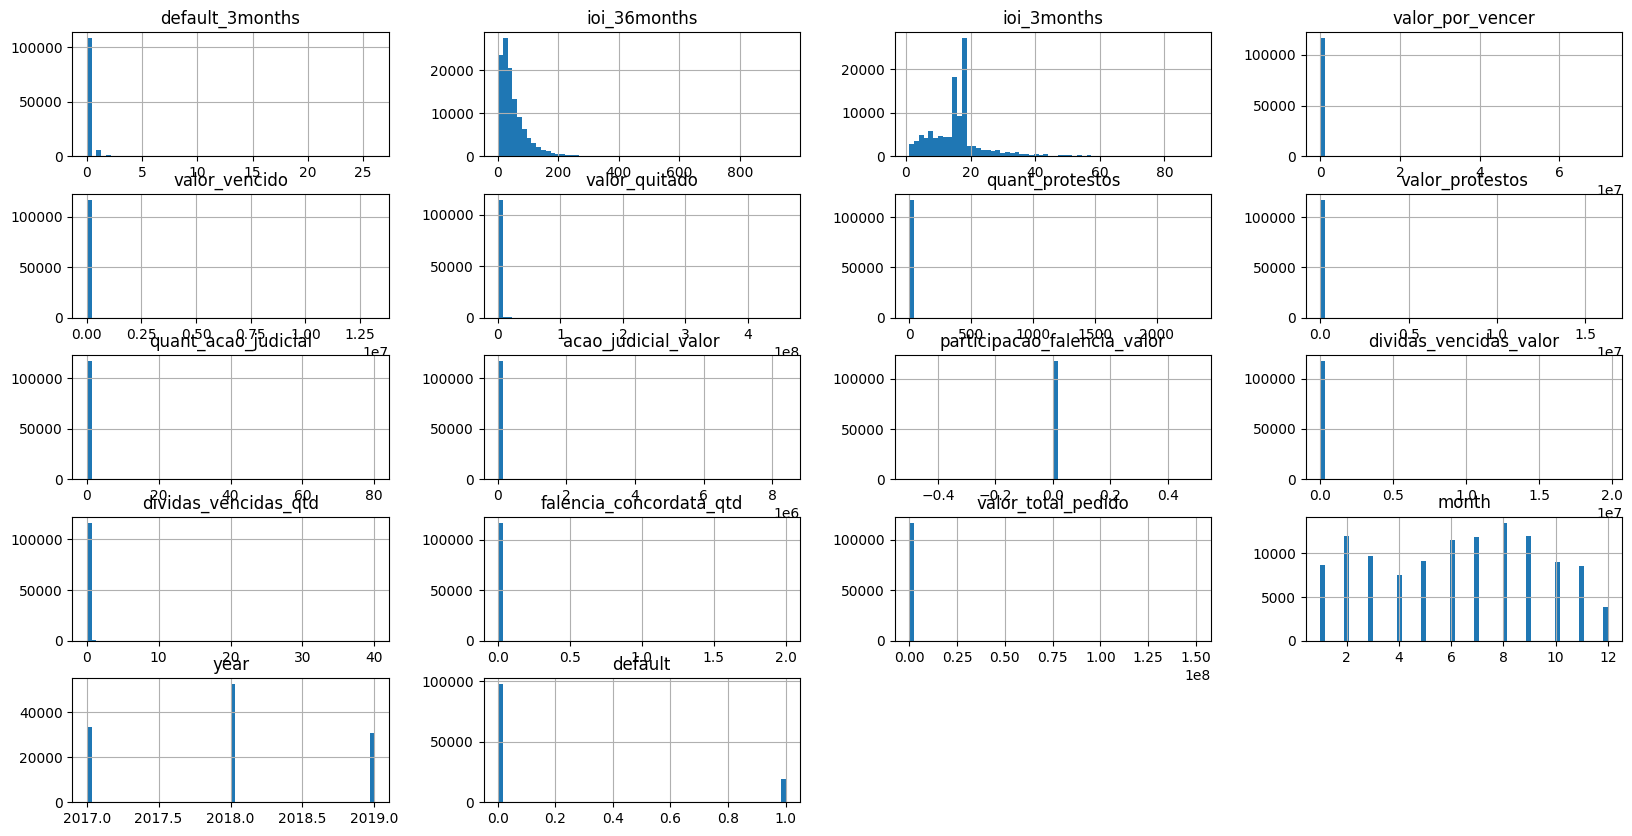

In [24]:
df.hist(bins=60, figsize=(20,10))

# Os histogramas de cada variável numérica são importantes para verificar a existência de outliers

#É possível observar que variáveis como ioi_36months, ioi_3months, month e year possuem distribuições mais uniformes que as demais variáveis
# No próximo kernel, analisarei as demais variáveis para verificar a existência de outliers

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
2587,11,3.951327,1.708333,7.422205e+04,9309.780000,1.873087e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42/56/70,8858.174496,7,2019,0
4202,17,172.000000,18.264130,1.100559e+06,117341.620000,1.198179e+07,32,230780.0,0,0.0,...,0,0,sociedade anonima fechada,lucro real,loja de departamentos,missing,6134.117739,2,2019,1
4511,25,3.568000,2.256410,4.841883e+04,5168.050000,1.427076e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,missing,2706.742456,4,2018,0
4993,11,4.004525,1.736842,8.715682e+04,8665.440000,1.838146e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42,2607.871486,6,2019,0
6794,11,3.948276,2.080000,6.960629e+04,13517.090000,2.020808e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,28/42/56,23594.273199,9,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116739,17,3.678740,2.404526,4.191377e+04,3554.449321,1.406368e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,28/42/56,1094.034106,3,2018,1
116805,22,3.597269,2.298220,4.678714e+04,5515.299175,1.422887e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42,1001.211314,4,2018,1
116883,11,8.100000,8.100000,7.758984e+03,0.000000,4.398930e+03,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de eletrodomesticos,60/90/120/150/180/210,1380.511521,10,2018,1
116958,21,115.000000,1.000000,1.391114e+06,81174.640000,1.202904e+07,32,230780.0,0,0.0,...,0,0,sociedade anonima fechada,lucro real,loja de departamentos,missing,5390.627445,2,2019,1


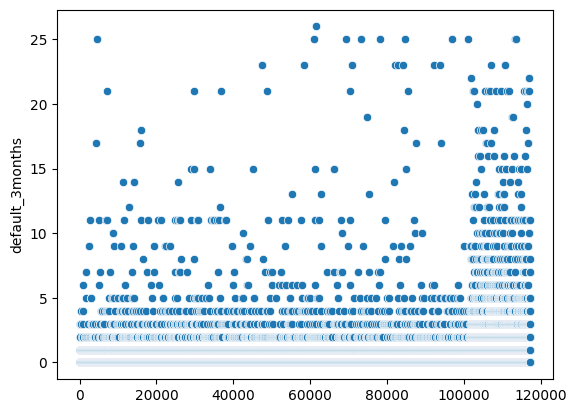

In [25]:
sns.scatterplot(x= df.index, y = "default_3months", data = df)
df[(df["default_3months"] > 10)]
# Observa-se que há poucos valores cujo default_3months é maior ou igual a 20 (utilizando df[df["default_3months"]>=20], verifica-se que há somente 44 linhas)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
3097,0,50.000000,1.000000,17983.74,14138.40,800985.76,2324,9668391.0,18,4183436.0,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,2395.719476,2,2019,0
26688,0,23.500000,23.500000,373568.99,12940.86,2963076.31,420,1337738.0,0,0.0,...,27,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7350.332749,3,2017,0
29698,0,18.333333,14.000000,35748.14,4551.06,3328063.00,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11996.556979,4,2017,0
34421,0,18.333333,14.000000,35748.14,4551.06,3328063.00,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11485.802418,4,2017,0
38781,0,58.000000,18.264130,20806.50,15286.81,2733344.86,684,1497707.0,0,0.0,...,0,2,empresa individual respons limitada empresaria,lucro real,com de maquinas e equip para escritorio,missing,2368.321417,11,2018,0
42207,0,27.000000,27.000000,364552.15,0.00,2962492.29,396,1322735.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7037.351395,3,2017,0
42626,0,33.000000,66.000000,105560.77,0.00,1246330.14,198,374937.0,2,5959.0,...,1,0,sociedade anonima fechada,lucro real,farmacia e drogaria,80 dias,18673.203332,2,2019,0
56121,0,25.250000,3.631349,388967.45,22412.73,2906874.72,396,1322140.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,8448.945969,2,2017,0
58941,0,74.500000,18.258328,13384.26,14138.40,796711.36,2324,9668391.0,18,4183436.0,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,7462.495253,2,2019,0
61295,0,30.083333,9.612899,717620.00,1796975.00,6020925.31,176,1816108.0,0,0.0,...,5,0,sociedade empresaria limitada,missing,ind de equip para processamento de dados,60 dias,411137.222903,4,2017,0


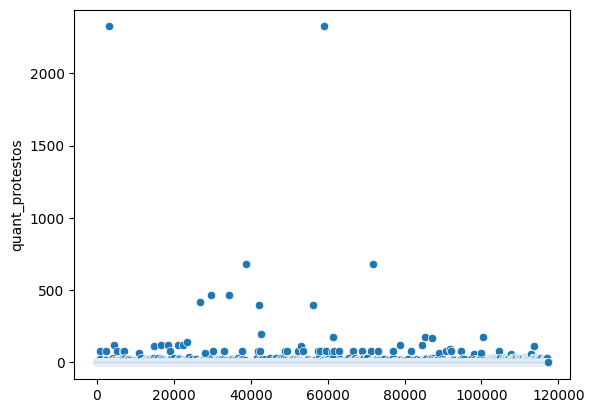

In [26]:
sns.scatterplot(x= df.index, y = "quant_protestos", data = df)
df[df["quant_protestos"]>=150] # verifica-se que há poucos pontos (9) em que a qtd de protestos é maior que 200

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
4421,0,101.000000,16.000000,28320117.69,2538135.56,2.873013e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,12318.504809,2,2019,0
14939,0,17.206897,20.000000,272721.66,9425.69,1.770871e+05,115,16305457.0,80,6975410.0,...,40,0,sociedade anonima fechada,lucro real,farmacia e drogaria,45 dias,54286.968785,6,2019,0
16586,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,5796.520201,2,2019,0
21185,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,6160.087013,2,2019,0
61230,0,101.000000,16.953687,12418158.99,377204.01,1.949882e+08,73,478875.0,50,2404102.0,...,33,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,273414.156878,8,2017,0
91863,0,15.760000,11.285714,137184.62,0.00,0.000000e+00,96,7411448.0,64,8390986.0,...,35,0,sociedade anonima fechada,lucro real,farmacia e drogaria,90,21122.663913,3,2019,0
98045,0,101.000000,17.315762,12062852.31,887654.24,1.969364e+08,62,435553.0,47,2303435.0,...,35,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,9733.268910,8,2017,0


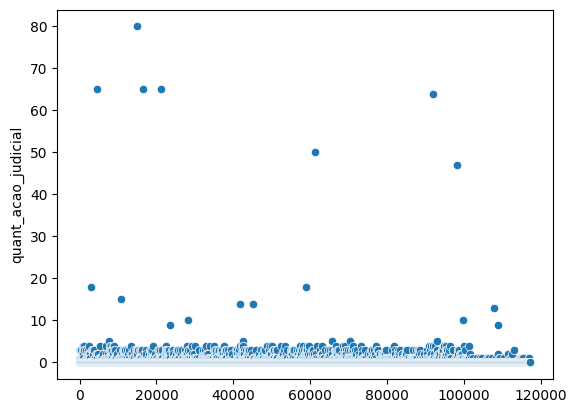

In [27]:
sns.scatterplot(x= df.index, y = "quant_acao_judicial", data = df)
df[df["quant_acao_judicial"]>=20] # verifica-se que há poucos pontos (9) em que a qtd de ações judiciais é maior que 20

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
4421,0,101.000000,16.000000,28320117.69,2538135.56,2.873013e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,12318.504809,2,2019,0
6942,0,37.125000,6.000000,627542.41,97603.85,4.876897e+07,82,430874.0,1,0.0,...,33,0,sociedade anonima fechada,lucro real,com atacad de generos alimenticios,30 dias,89149.716749,1,2019,0
14939,0,17.206897,20.000000,272721.66,9425.69,1.770871e+05,115,16305457.0,80,6975410.0,...,40,0,sociedade anonima fechada,lucro real,farmacia e drogaria,45 dias,54286.968785,6,2019,0
16586,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,5796.520201,2,2019,0
21185,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,6160.087013,2,2019,0
26688,0,23.500000,23.500000,373568.99,12940.86,2.963076e+06,420,1337738.0,0,0.0,...,27,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7350.332749,3,2017,0
29698,0,18.333333,14.000000,35748.14,4551.06,3.328063e+06,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11996.556979,4,2017,0
34421,0,18.333333,14.000000,35748.14,4551.06,3.328063e+06,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11485.802418,4,2017,0
42207,0,27.000000,27.000000,364552.15,0.00,2.962492e+06,396,1322735.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7037.351395,3,2017,0
56121,0,25.250000,3.631349,388967.45,22412.73,2.906875e+06,396,1322140.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,8448.945969,2,2017,0


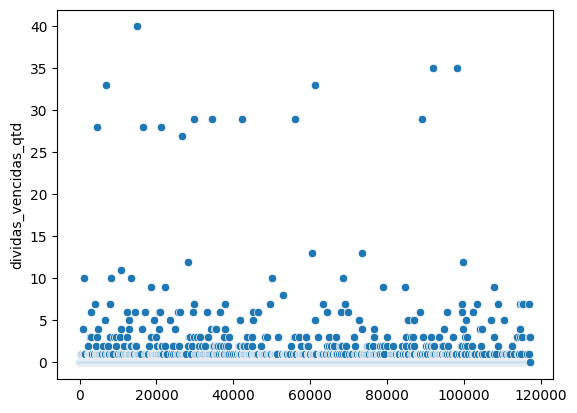

In [28]:
sns.scatterplot(x= df.index, y = "dividas_vencidas_qtd", data = df)
df[df["dividas_vencidas_qtd"]>= 25] # pelo scatterplot, é possível verificar que há poucas linhas cujo valor de dividas_vencidas_qtd é maior ou igual a 25 (outliers, pois os demais estão abaixo de 15)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
4623,0,16.333333,11.000000,32526.06,0.00,1213059.58,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,26097.451627,10,2017,0
12654,0,22.750000,7.000000,12726.93,0.00,1098615.43,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,5750.518779,5,2017,0
13649,0,19.666667,11.333333,28683.17,3932.88,1107409.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,10202.130721,6,2017,0
13865,0,18.545455,16.250000,10482.71,0.00,1202576.87,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,2983.985919,9,2017,0
17802,0,14.944444,9.285714,73401.49,0.00,1215056.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,42 dias,107226.858154,10,2017,0
25522,0,28.000000,28.000000,12025.95,0.00,1091205.58,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,4006.679400,4,2017,0
33271,0,17.400000,14.000000,42634.99,0.00,1159941.88,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,10071.397089,8,2017,0
38781,0,58.000000,18.264130,20806.50,15286.81,2733344.86,684,1497707.0,0,0.0,...,0,2,empresa individual respons limitada empresaria,lucro real,com de maquinas e equip para escritorio,missing,2368.321417,11,2018,0
40488,0,14.941176,8.333333,58231.68,0.00,1215056.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,42 dias,5530.439473,10,2017,0
40686,0,7.000000,7.000000,15932.35,0.00,1084473.63,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,4042.200527,4,2017,0


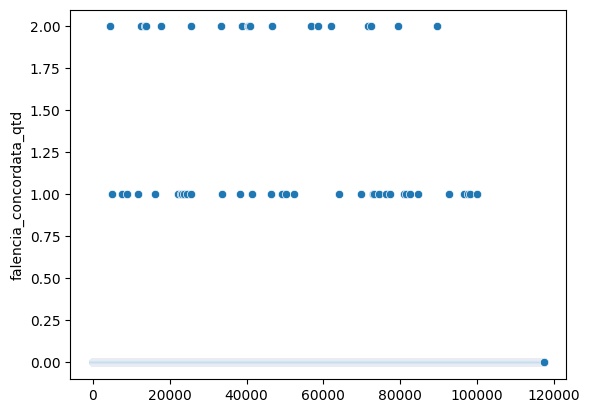

In [29]:
sns.scatterplot(x= df.index, y = "falencia_concordata_qtd", data = df)
df[df["falencia_concordata_qtd"] >= 2] # Observa-se que há poucas linhas em que falencia_concordata_qtd é igual a 2, assumin do esses valores como outliers

In [30]:
### REMOVENDO OUTLIERS IDENTIFICADOS

df = df[(df["default_3months"] < 10) & (df["quant_protestos"] < 200) & (df["quant_acao_judicial"] < 20) & (df["dividas_vencidas_qtd"] < 25) & (df["falencia_concordata_qtd"] < 2)]
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


## Variáveis Categóricas

In [31]:
var_categoricas = ["tipo_sociedade", "opcao_tributaria", "atividade_principal", "forma_pagamento"]


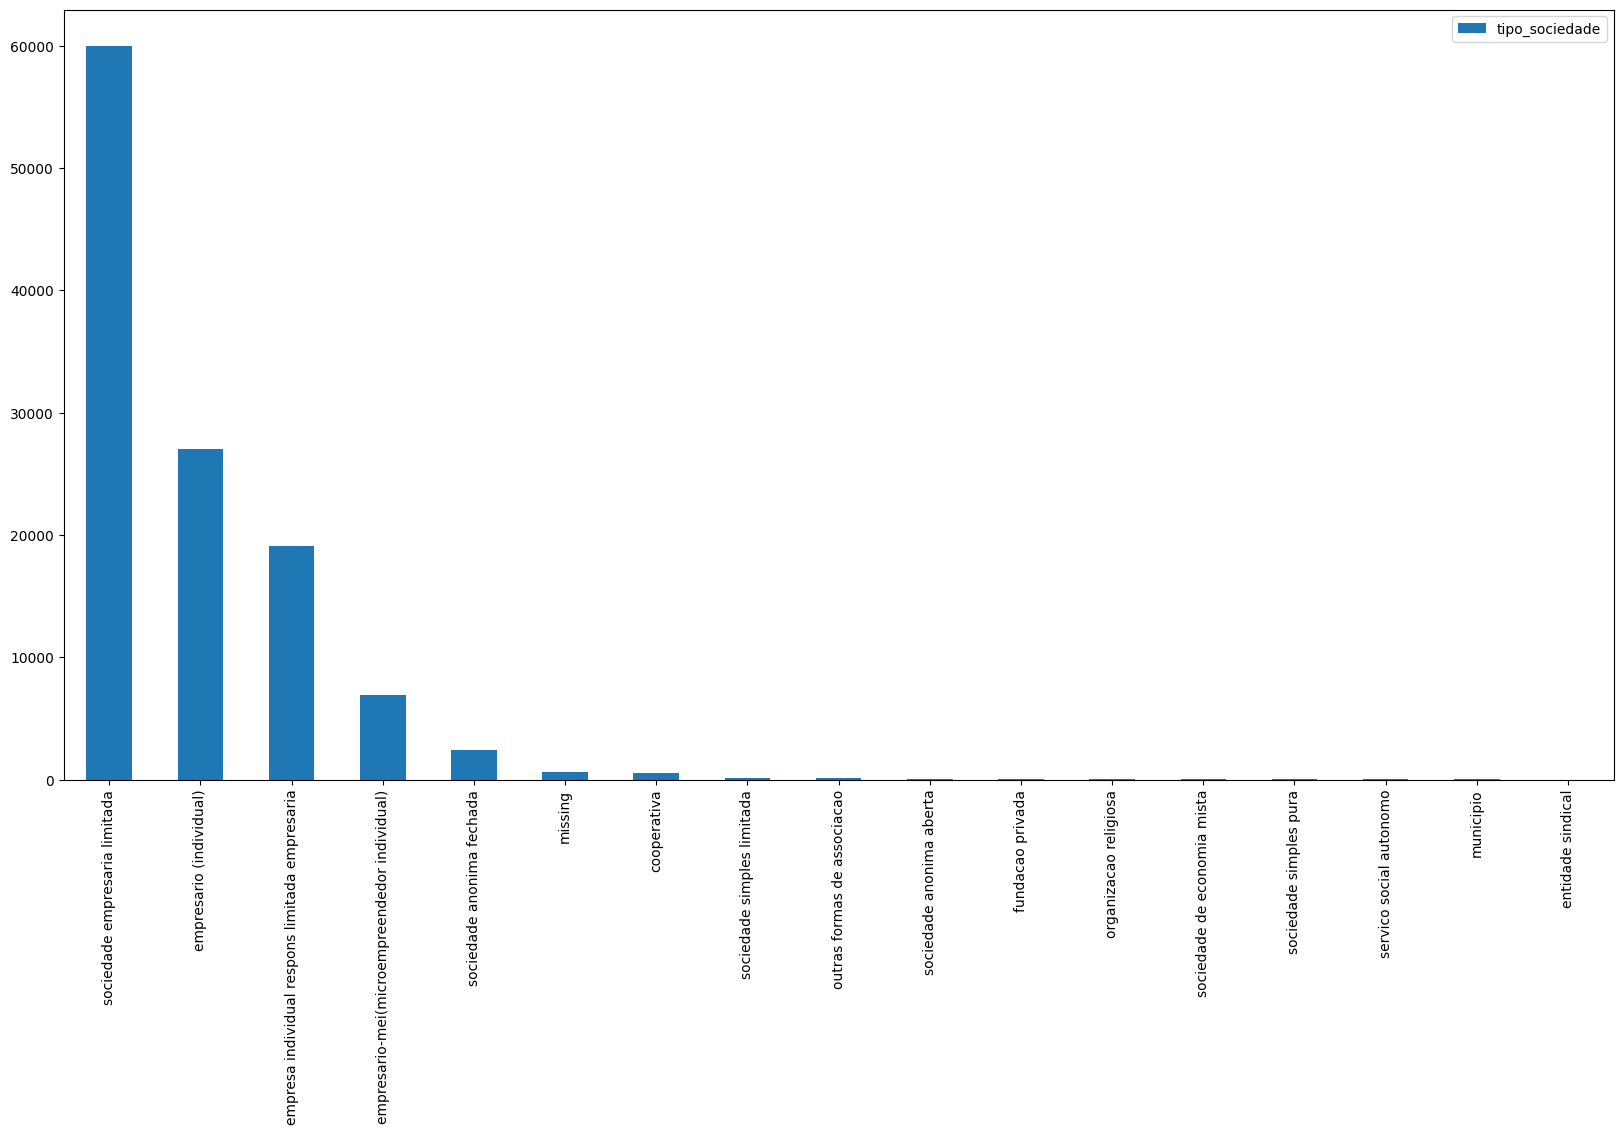

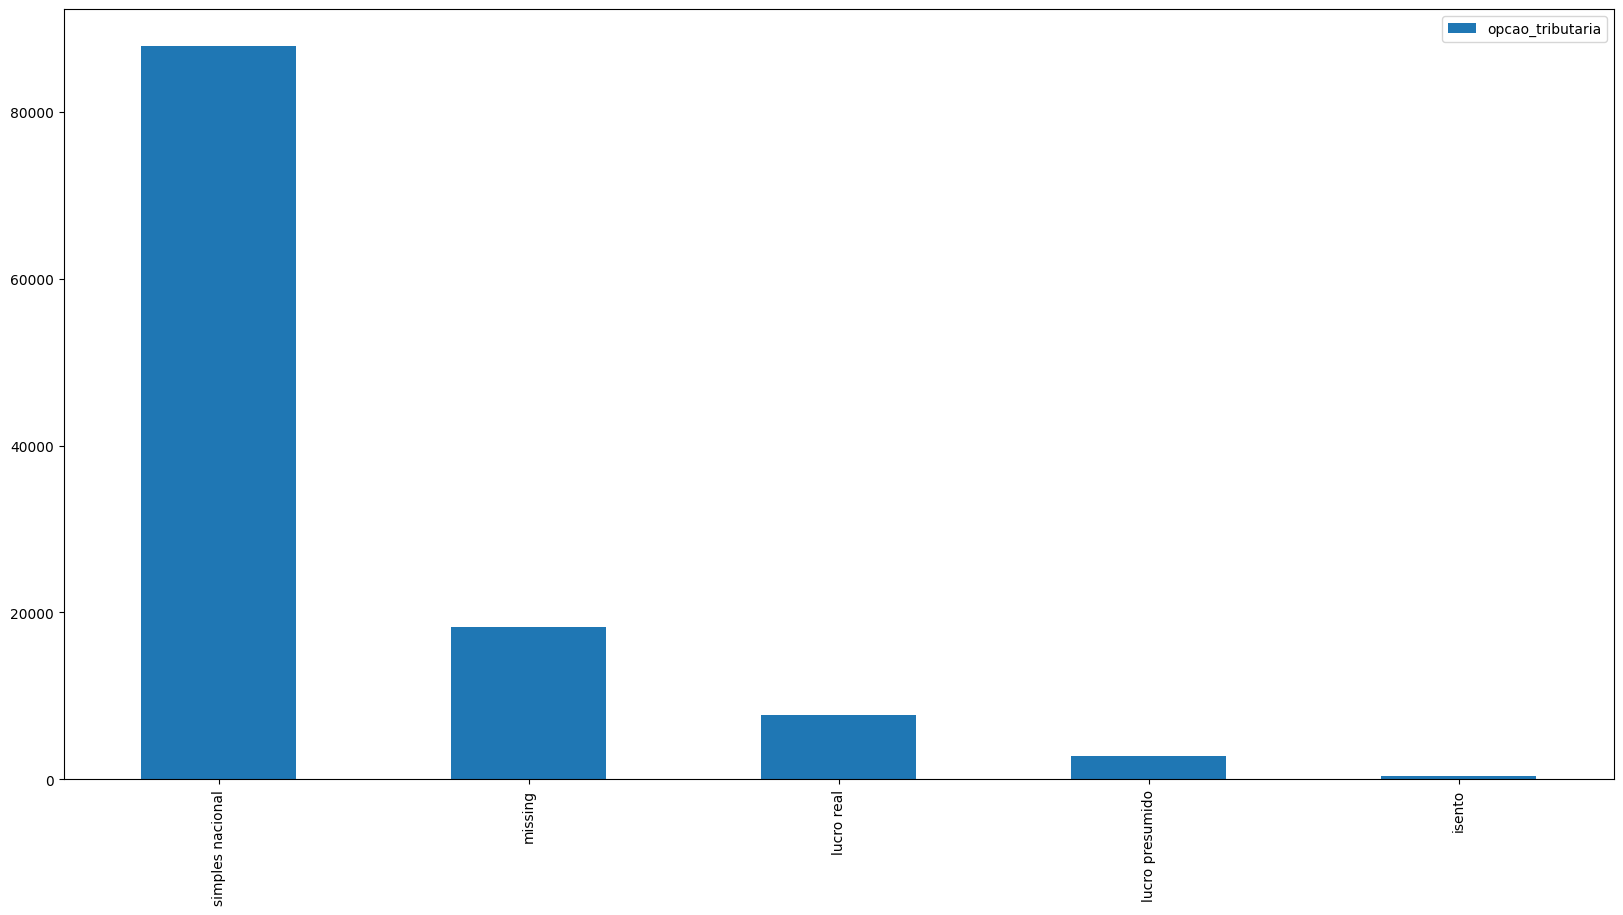

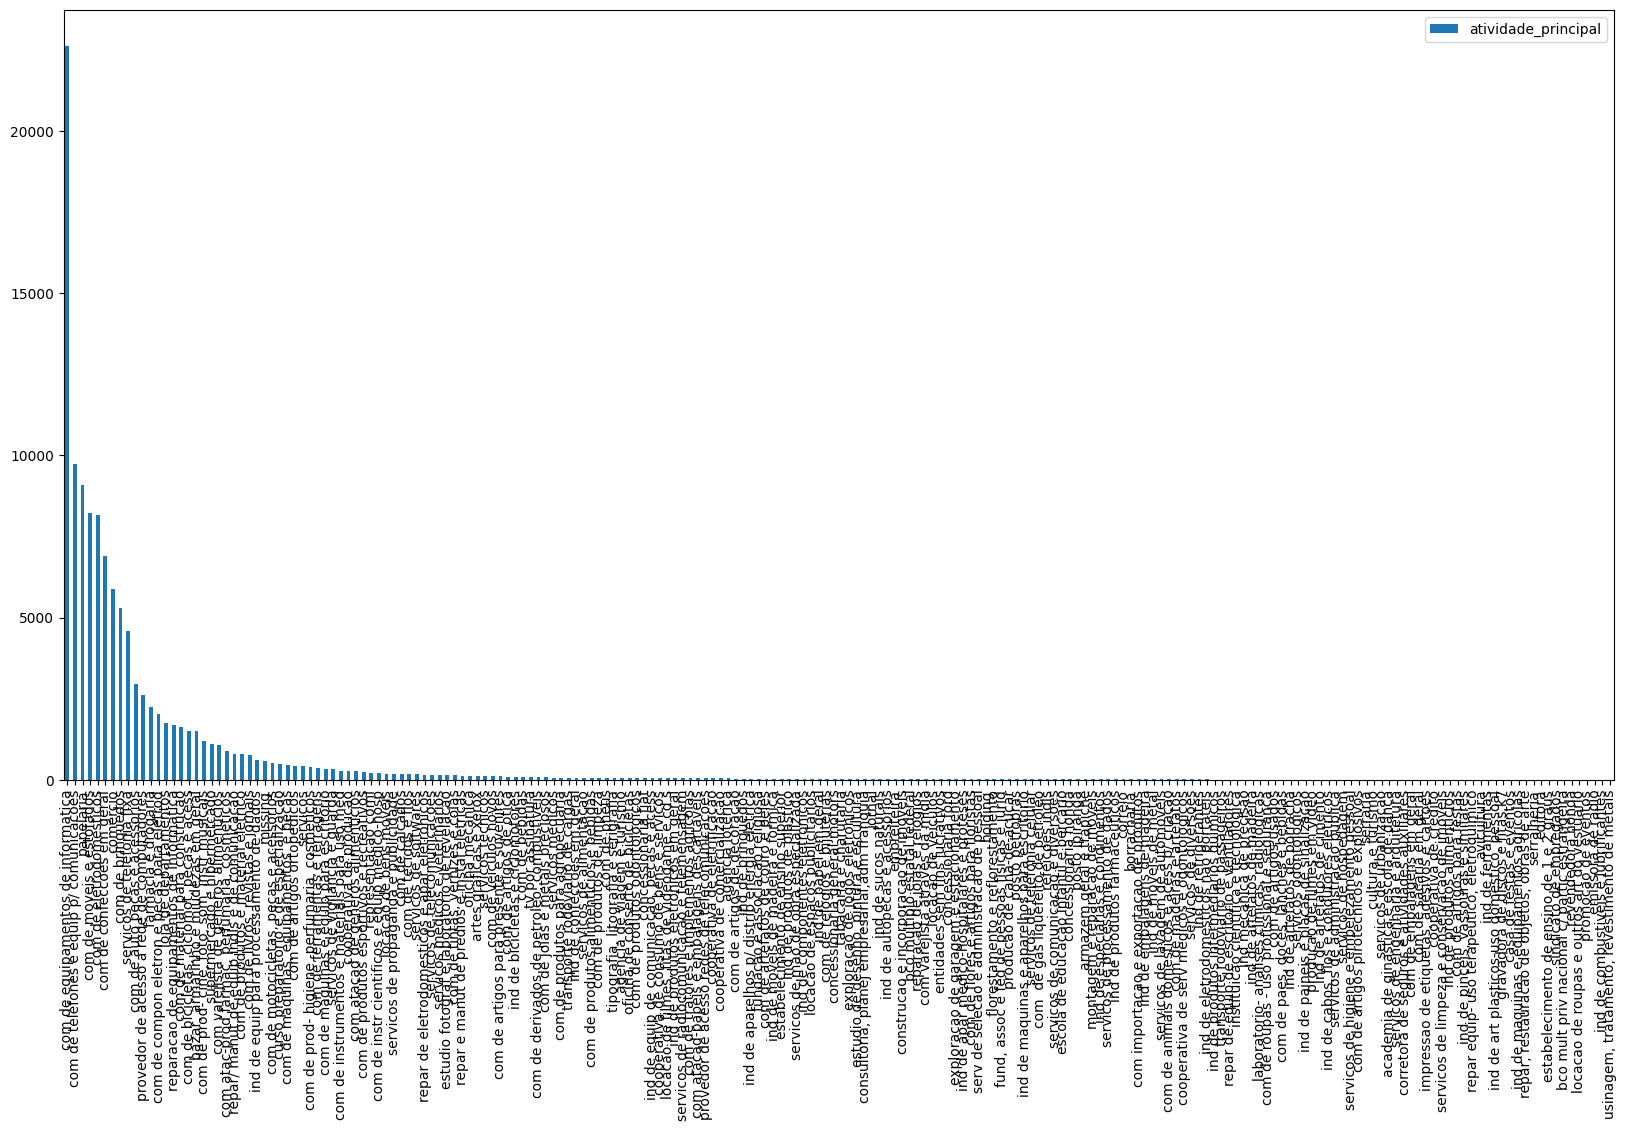

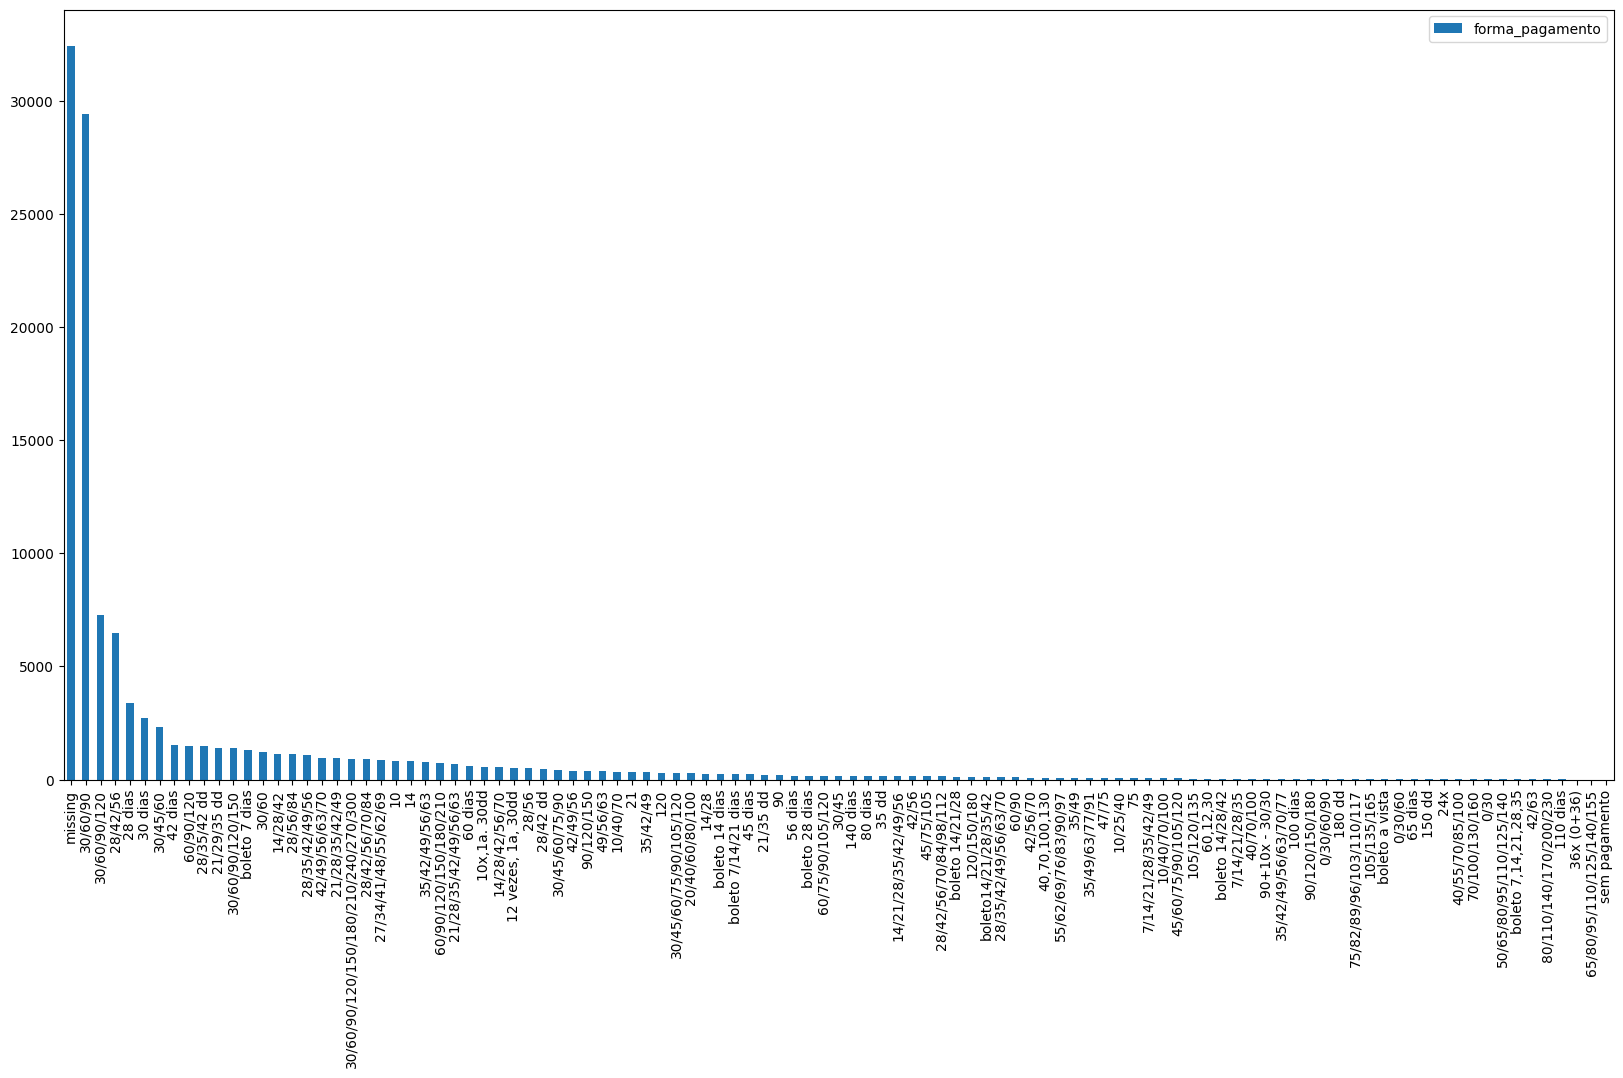

In [32]:
for var in var_categoricas:
    pd.DataFrame(df[var].value_counts()).plot(kind='bar', figsize=(20,10))


In [33]:
## Realizando one hot encoding da variável opcao_tributaria para utilizá-la no modelo
one_hot = pd.get_dummies(df, columns=["opcao_tributaria"], prefix="opcao_")
# Join the encoded df
one_hot = one_hot[["opcao__isento", "opcao__simples nacional", "opcao__lucro presumido", "opcao__lucro real", "opcao__missing"]]
df=df.drop("opcao_tributaria", axis=1)
df = df.join(one_hot)
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,forma_pagamento,valor_total_pedido,month,year,default,opcao__isento,opcao__simples nacional,opcao__lucro presumido,opcao__lucro real,opcao__missing
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,30/60/90,34665.674938,6,2019,0,0,1,0,0,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,30/60/90,7134.489373,10,2018,0,0,0,0,0,1
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,missing,72653.621143,4,2018,0,0,1,0,0,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,missing,14576.805783,4,2017,1,0,1,0,0,0
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,30/60/90,2655.505663,10,2017,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,30/60/90,13290.156794,1,2019,1,0,1,0,0,0
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,missing,4574.831977,4,2018,1,0,1,0,0,0
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,missing,944.324251,1,2017,1,0,1,0,0,0
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,30/60/90/120,5295.273974,11,2019,1,0,1,0,0,0


## Criação dos datasets de treino/teste

In [35]:
from sklearn.model_selection import train_test_split

df_train = df.drop(["valor_por_vencer", "year","tipo_sociedade","atividade_principal", "forma_pagamento", "valor_vencido", "valor_quitado", "valor_protestos", "acao_judicial_valor", "participacao_falencia_valor", "dividas_vencidas_valor", "valor_total_pedido"], axis=1)

y_tot = df_train.pop("default")
x = df_train
x_train, x_test, y_train, y_test = train_test_split(x, y_tot)

metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall'])
df_train


,ioi_36months,ioi_3months,quant_protestos,quant_acao_judicial,dividas_vencidas_qtd,falencia_concordata_qtd,month,opcao__isento,opcao__simples nacional,opcao__lucro presumido,opcao__lucro real,opcao__missing
0,58.000000,18.236092,0,0,0,0,6,0,1,0,0,0
1,16.052632,7.500000,0,0,0,0,10,0,0,0,0,1
2,13.250000,3.904762,1,0,0,0,4,0,1,0,0,0
3,136.925000,10.144219,0,0,0,0,4,0,1,0,0,0
4,140.333333,17.651678,0,0,0,0,10,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117268,32.679779,16.582511,0,0,0,0,1,0,1,0,0,0
117269,41.894875,16.649383,0,0,0,0,4,0,1,0,0,0
117270,132.525884,18.188413,0,0,0,0,1,0,1,0,0,0
117271,26.930798,16.337212,2,0,0,0,11,0,1,0,0,0


- Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
acc_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean()
rec_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.83493,0.000207


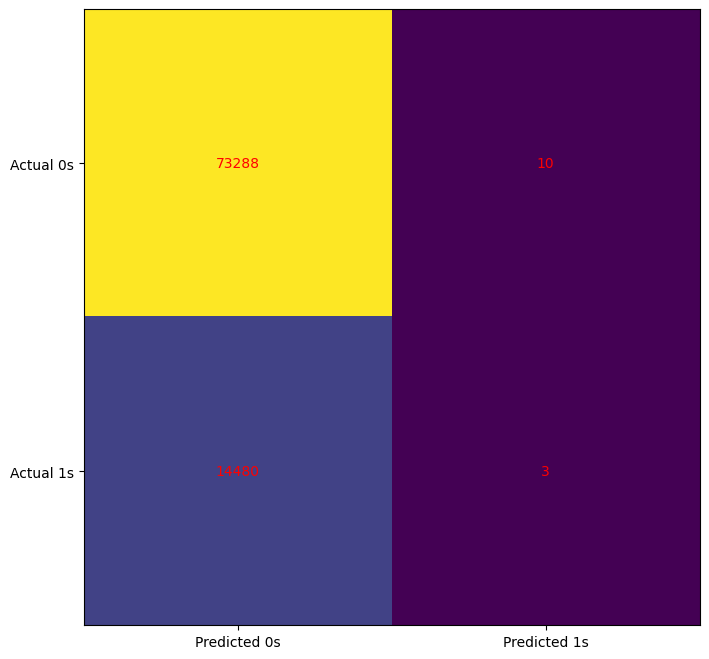

In [37]:
cm = confusion_matrix(y_train, model.predict(x_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia nosso classificador
knn = KNeighborsClassifier(n_neighbors=20)

acc_scores = cross_val_score(knn, x_train, y_train, cv = 5, scoring="accuracy").mean()
print("Acurácia com cross validation:", acc_scores)
rec_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['KNN=20'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

Acurácia com cross validation: 0.837265468034572


,Model,Accuracy,Recall
0,Logistic Regression,0.834930,0.000207
1,KNN=20,0.837265,0.050197


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Instancia nosso classificador
rfc = RandomForestClassifier(random_state=42)

acc_scores = cross_val_score(rfc, x_train, y_train, cv = 5, scoring="accuracy").mean()
print("Acurácia com cross validation:", acc_scores)
rec_scores = cross_val_score(rfc, x_train, y_train, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

Acurácia com cross validation: 0.8580899815129376


,Model,Accuracy,Recall
0,Logistic Regression,0.834930,0.000207
1,KNN=20,0.837265,0.050197
2,Random Forest,0.858090,0.342676
